# Data analysis & Pre-processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.models import resnet18
from torchvision.models import ResNet18_Weights
from torch import nn, optim
import torch.optim as optim
import torchvision.transforms as transforms
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Step 1 Loading the Dataset and main statistics
df = pd.read_csv("/content/drive/MyDrive/DLDATASET/iou_zipcodes_2020 (1).csv")

In [ ]:
#step2:
df.head(20)

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,85321,176,Ajo Improvement Co,AZ,Bundled,Investor Owned,0.087890,0.000000,0.093887
1,36560,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
2,36513,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
3,36280,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
4,35473,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
5,35229,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
6,36375,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
7,36042,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
8,36370,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057
9,35555,195,Alabama Power Co,AL,Bundled,Investor Owned,0.121895,0.063652,0.135057


In [ ]:
Statistics = df.describe
print(Statistics)
df.describe()

<bound method NDFrame.describe of          zip  eiaid        utility_name state service_type       ownership  \
0      85321    176  Ajo Improvement Co    AZ      Bundled  Investor Owned   
1      36560    195    Alabama Power Co    AL      Bundled  Investor Owned   
2      36513    195    Alabama Power Co    AL      Bundled  Investor Owned   
3      36280    195    Alabama Power Co    AL      Bundled  Investor Owned   
4      35473    195    Alabama Power Co    AL      Bundled  Investor Owned   
...      ...    ...                 ...   ...          ...             ...   
52172  96146  57483   Liberty Utilities    CA      Bundled  Investor Owned   
52173  96161  57483   Liberty Utilities    CA      Bundled  Investor Owned   
52174  96133  57483   Liberty Utilities    CA      Bundled  Investor Owned   
52175  96118  57483   Liberty Utilities    CA      Bundled  Investor Owned   
52176  96107  57483   Liberty Utilities    CA      Bundled  Investor Owned   

       comm_rate  ind_rate  r

,zip,eiaid,comm_rate,ind_rate,res_rate
count,52177.000000,52177.000000,52177.000000,52177.000000,52177.000000
mean,42503.161795,13894.579777,0.091207,0.063734,0.115469
std,29166.080511,11445.598550,0.047823,0.045584,0.052939
min,1002.000000,176.000000,0.008510,0.000000,0.000000
25%,16685.000000,5860.000000,0.065812,0.036541,0.091532
50%,40061.000000,13781.000000,0.092400,0.062603,0.115326
75%,62425.000000,15477.000000,0.113309,0.077213,0.135057
max,99950.000000,57483.000000,0.348755,0.360000,0.351657


In [ ]:
#Step3
df.dtypes

zip               int64
eiaid             int64
utility_name     object
state            object
service_type     object
ownership        object
comm_rate       float64
ind_rate        float64
res_rate        float64
dtype: object

In [ ]:
print(df.isnull().any())

zip             False
eiaid           False
utility_name    False
state           False
service_type    False
ownership       False
comm_rate       False
ind_rate        False
res_rate        False
dtype: bool


In [ ]:
#step4
df['utility_name'].unique()


array(['Ajo Improvement Co', 'Alabama Power Co',
       'Alaska Electric Light&Power Co', 'Alaska Power and Telephone Co',
       'Alpena Power Co', 'Amana Society Service Co',
       'Appalachian Power Co', 'Arizona Public Service Co',
       'Entergy Arkansas LLC', 'Atlantic City Electric Co',
       'Baltimore Gas & Electric Co', 'Versant Power',
       'Black Diamond Power Co', 'Duke Energy Progress - (NC)',
       'Central Hudson Gas & Elec Corp', 'Cleco Power LLC',
       'Central Maine Power Co',
       'Cheyenne Light Fuel & Power d/b/a Black', 'Duke Energy Ohio Inc',
       'Citizens Electric Co - (PA)', 'Cleveland Electric Illum Co',
       'Commonwealth Edison Co', 'Connecticut Light & Power Co',
       'Consolidated Edison Co-NY Inc', 'Consolidated Water Power Co',
       'Consumers Energy Co', 'Dahlberg Light & Power Co',
       'Dayton Power & Light Co', 'Delmarva Power',
       'DTE Electric Company', 'Duke Energy Carolinas, LLC',
       'Duquesne Light Co', 'El Paso Ele

In [ ]:
df['ownership'].unique()

array(['Investor Owned'], dtype=object)

In [ ]:
df['service_type'].unique()

array(['Bundled', 'Delivery'], dtype=object)

<Axes: xlabel='comm_rate'>

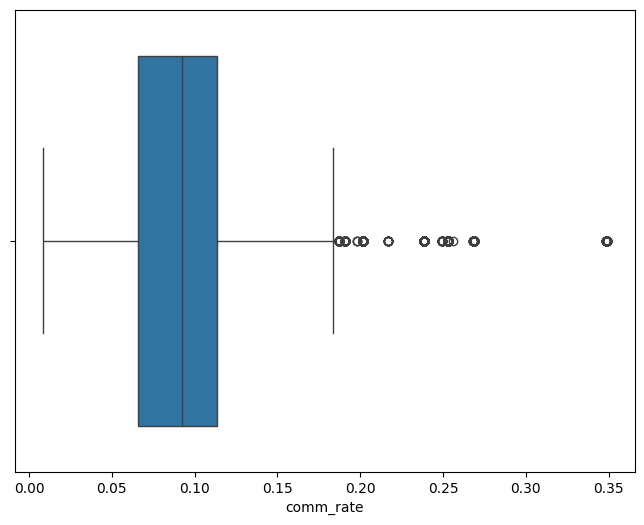

In [ ]:
#step5
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['comm_rate'])

In [ ]:
Q1 = df['comm_rate'].quantile(0.25)
Q3 = df['comm_rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['comm_rate'] = np.where(df['comm_rate'] > upper_bound, df['comm_rate'].median(), df['comm_rate'])
df['comm_rate'] = np.where(df['comm_rate'] < lower_bound, df['comm_rate'].mode(), df['comm_rate'])


<Axes: xlabel='ind_rate'>

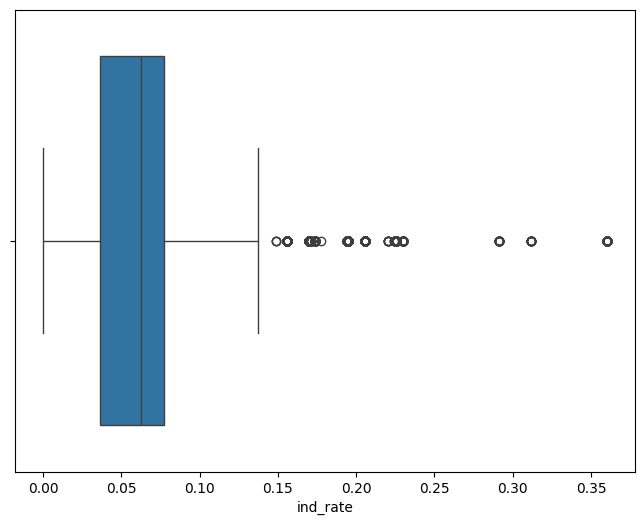

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ind_rate'])

In [ ]:
Q1 = df['ind_rate'].quantile(0.25)
Q3 = df['ind_rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['ind_rate'] = np.where(df['ind_rate'] > upper_bound, df['ind_rate'].median(), df['ind_rate'])
df['ind_rate'] = np.where(df['ind_rate'] < lower_bound, df['ind_rate'].mode(), df['ind_rate'])


<Axes: xlabel='res_rate'>

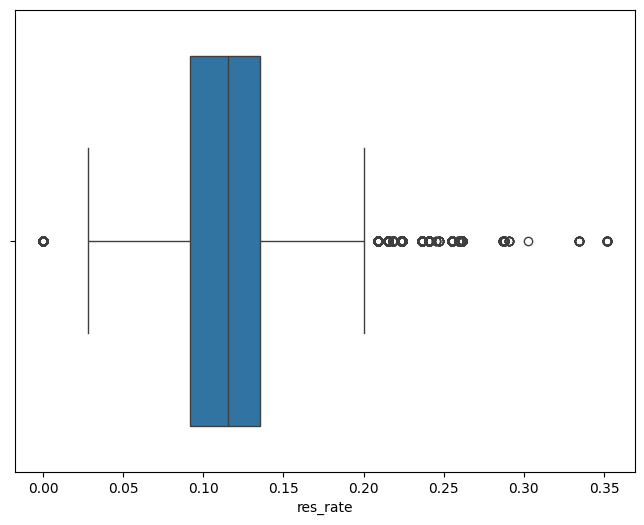

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['res_rate'])

In [ ]:
Q1 = df['res_rate'].quantile(0.25)
Q3 = df['res_rate'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['res_rate'] = np.where(df['res_rate'] > upper_bound, df['res_rate'].mode(), df['res_rate'])
df['res_rate'] = np.where(df['res_rate'] < lower_bound, df['res_rate'].mode(), df['res_rate'])


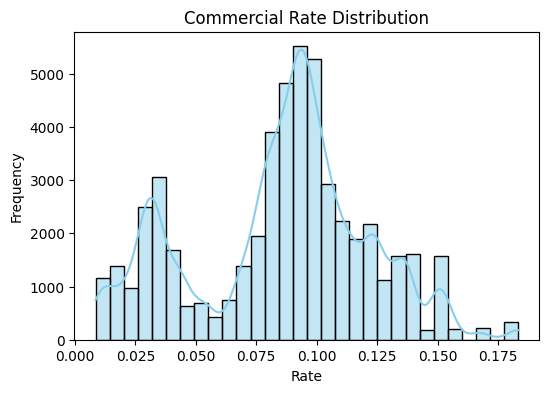

In [ ]:
#step6
plt.figure(figsize=(6, 4))
sns.histplot(df['comm_rate'], bins=30, kde=True, color='skyblue')
plt.title('Commercial Rate Distribution')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

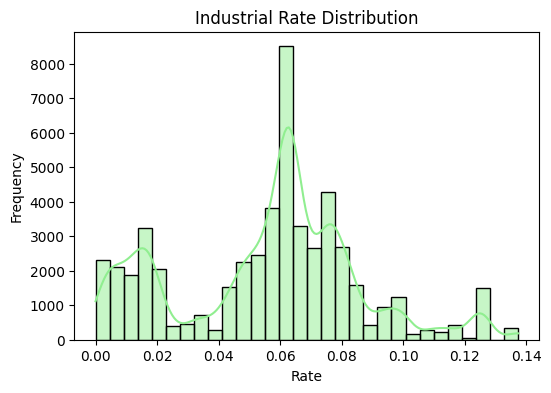

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['ind_rate'], bins=30, kde=True, color='lightgreen')
plt.title('Industrial Rate Distribution')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

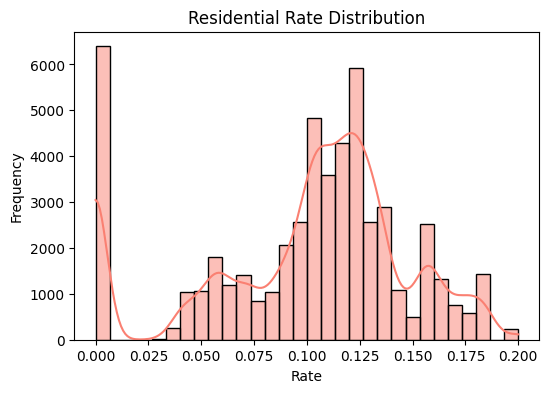

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['res_rate'], bins=30, kde=True, color='salmon')
plt.title('Residential Rate Distribution')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

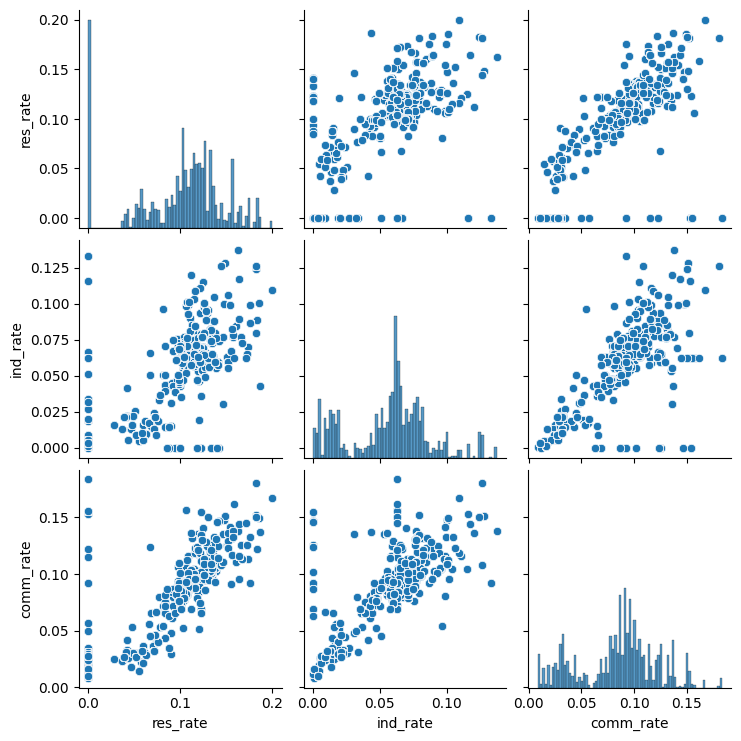

In [ ]:
columns_to_plot = ['res_rate', 'ind_rate', 'comm_rate']
sns.pairplot(df[columns_to_plot])
plt.show()


<ipython-input-26-875e785d6085>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

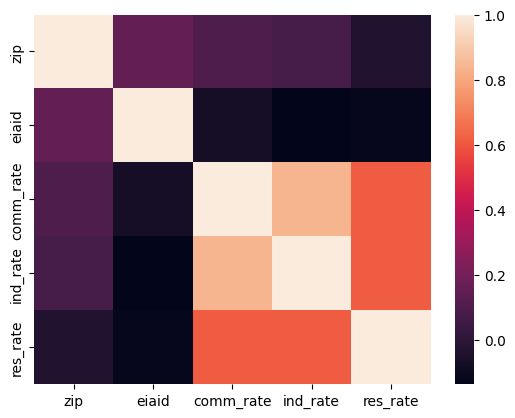

In [ ]:
#step 7
sns.heatmap(df.corr())

In [ ]:
#step8
df.dtypes

zip               int64
eiaid             int64
utility_name     object
state            object
service_type     object
ownership        object
comm_rate       float64
ind_rate        float64
res_rate        float64
dtype: object

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc_filter = enc.fit_transform(df[['service_type', 'ownership','state']])
enc_df = pd.DataFrame(enc_filter, columns=enc.get_feature_names_out(['service_type', 'ownership','state']))

In [ ]:
columns_to_drop = ['service_type', 'ownership','state']

# Use the drop method to remove the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:

columns_to_drop = ['utility_name']

# Use the drop method to remove the specified columns
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df = pd.concat([df, enc_df], axis=1, join="inner")

In [ ]:
df

,zip,eiaid,comm_rate,ind_rate,res_rate,service_type,ownership,state
0,85321,176,0.087890,0.000000,0.093887,0.0,0.0,3.0
1,36560,195,0.121895,0.063652,0.135057,0.0,0.0,1.0
2,36513,195,0.121895,0.063652,0.135057,0.0,0.0,1.0
3,36280,195,0.121895,0.063652,0.135057,0.0,0.0,1.0
4,35473,195,0.121895,0.063652,0.135057,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
52172,96146,57483,0.146224,0.000000,0.140019,0.0,0.0,4.0
52173,96161,57483,0.146224,0.000000,0.140019,0.0,0.0,4.0
52174,96133,57483,0.146224,0.000000,0.140019,0.0,0.0,4.0
52175,96118,57483,0.146224,0.000000,0.140019,0.0,0.0,4.0


In [ ]:
#step 9
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df['normalized_comm_rate'] = scaler.fit_transform(df[['comm_rate']])




In [ ]:
df['normalized_ind_rate'] = scaler.fit_transform(df[['ind_rate']])

In [ ]:
df['normalized_res_rate'] = scaler.fit_transform(df[['res_rate']])

In [ ]:
columns_to_drop = ['comm_rate', 'ind_rate','res_rate']

# Use the drop method to remove the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df

,zip,eiaid,service_type,ownership,state,normalized_comm_rate,normalized_ind_rate,normalized_res_rate
0,85321,176,0.0,0.0,3.0,0.068174,-1.852695,-0.121452
1,36560,195,0.0,0.0,1.0,0.994285,0.243200,0.718314
2,36513,195,0.0,0.0,1.0,0.994285,0.243200,0.718314
3,36280,195,0.0,0.0,1.0,0.994285,0.243200,0.718314
4,35473,195,0.0,0.0,1.0,0.994285,0.243200,0.718314
...,...,...,...,...,...,...,...,...
52172,96146,57483,0.0,0.0,4.0,1.656883,-1.852695,0.819534
52173,96161,57483,0.0,0.0,4.0,1.656883,-1.852695,0.819534
52174,96133,57483,0.0,0.0,4.0,1.656883,-1.852695,0.819534
52175,96118,57483,0.0,0.0,4.0,1.656883,-1.852695,0.819534


In [ ]:
#step10
Y_data = df['service_type']
X_data = df.drop(columns = ['service_type', 'normalized_ind_rate','normalized_res_rate'])

In [ ]:
#step 11
# Spliting the data into Training, Validation & Testing batches
X_train, X_com, Y_train, Y_com = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_com, Y_com, test_size=0.5, random_state=42)


In [ ]:
#step 12
print(f'X_train:{X_train.shape}\nX_test:{X_test.shape}\nY_train:{Y_train.shape}\nY_test:{Y_test.shape}\nX_val:{X_val.shape}\nY_val:{Y_val.shape}')

X_train:(36523, 5)
X_test:(7827, 5)
Y_train:(36523,)
Y_test:(7827,)
X_val:(7827, 5)
Y_val:(7827,)


# ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import xgboost as xgb

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_data, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
y_proba = model.predict_proba(X_test)

# Calculate log loss (lower is better)
log_loss_value = log_loss(Y_test, y_proba)
print(f'Log Loss: {log_loss_value:.2f}')



Accuracy: 0.91
Log Loss: 0.30


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [ ]:
predictions = random_forest_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"Model Accuracy: {accuracy}")
from sklearn.metrics import log_loss

predictions_proba = random_forest_model.predict_proba(X_test)

log_loss_value = log_loss(Y_test, predictions_proba)
print(f"Log Loss: {log_loss_value:.2f}")

Model Accuracy: 0.9868723648907628
Log Loss: 0.02


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
predictions = decision_tree_model.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)
print(f"Model Accuracy: {accuracy}")
from sklearn.metrics import log_loss
predictions_proba = decision_tree_model.predict_proba(X_test)
log_loss_value = log_loss(Y_test, predictions_proba)
print(f"Log Loss: {log_loss_value:.2f}")


Model Accuracy: 0.9867765427366807
Log Loss: 0.45


In [ ]:
# graph comparision for all the 3 above models

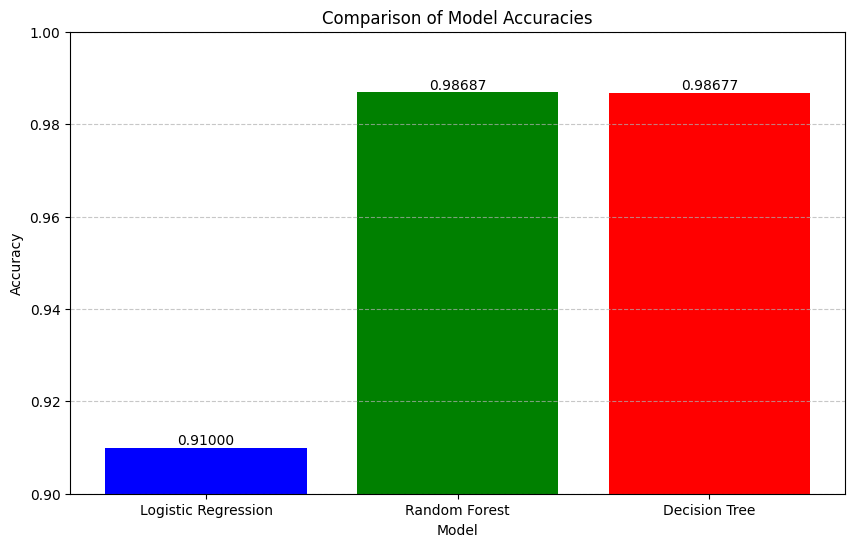

In [ ]:

model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [0.91, 0.98687, 0.98677]
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0.9, 1.0])
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f"{acc:.5f}", ha='center', va='bottom')

# Save the plot to a file

plt.show()


Random Forest and Decision Tree have nearly the same high accuracy, significantly surpassing Logistic Regression. The tree-based models likely perform better due to their ability to capture complex patterns. Random Forest slightly edges out over Decision Tree, potentially due to its ensemble nature, which typically offers improved robustness and generalization.

# Tutorial

Tensors

In [ ]:

import torch
import numpy as np
from torchvision.models import resnet18, ResNet18_Weights
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [ ]:
#data creation
data = [[0, 2], [3,7]]
x_data = torch.tensor(data)

In [ ]:
#data to numpy arr <-> vice versa
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [ ]:
x_ones = torch.ones_like(x_data) # retain data properties
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0097, 0.2586],
        [0.3167, 0.9529]]) 



In [ ]:
shape = (6, 6,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

# tensor attrib
tensor = torch.rand(9, 9)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Random Tensor: 
 tensor([[0.5628, 0.0806, 0.5267, 0.8418, 0.2071, 0.2467],
        [0.9527, 0.7128, 0.6537, 0.1362, 0.6108, 0.4367],
        [0.5238, 0.5754, 0.4164, 0.6672, 0.5859, 0.5050],
        [0.6964, 0.3775, 0.9323, 0.7686, 0.7421, 0.4834],
        [0.2002, 0.3804, 0.8648, 0.3390, 0.0534, 0.5122],
        [0.0386, 0.2995, 0.6365, 0.7492, 0.8481, 0.1159]]) 

Ones Tensor: 
 tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
Shape of tensor: torch.Size([9, 9])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

In [ ]:
tensor = torch.ones(5, 5)
tensor[:,1] = 0
print(tensor)

t2 = torch.rand(5, 5)
t2[:,1] = 0
print(t2)

tensor([[1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.]])
tensor([[0.2525, 0.0000, 0.4847, 0.3177, 0.9562],
        [0.9384, 0.0000, 0.1562, 0.4889, 0.5645],
        [0.2129, 0.0000, 0.0839, 0.3307, 0.9739],
        [0.0471, 0.0000, 0.1692, 0.2005, 0.6510],
        [0.8690, 0.0000, 0.6660, 0.1073, 0.0136]])


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1) #concatenate
print(t1)

tensor([[1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.]])


In [ ]:
# This computes the element-wise product
print(f"tensor.mul(t2) \n {tensor.mul(t2)} \n")
# Alternative syntax:
print(f"tensor * t2 \n {tensor * t2}")

tensor.mul(t2) 
 tensor([[0.2525, 0.0000, 0.4847, 0.3177, 0.9562],
        [0.9384, 0.0000, 0.1562, 0.4889, 0.5645],
        [0.2129, 0.0000, 0.0839, 0.3307, 0.9739],
        [0.0471, 0.0000, 0.1692, 0.2005, 0.6510],
        [0.8690, 0.0000, 0.6660, 0.1073, 0.0136]]) 

tensor * t2 
 tensor([[0.2525, 0.0000, 0.4847, 0.3177, 0.9562],
        [0.9384, 0.0000, 0.1562, 0.4889, 0.5645],
        [0.2129, 0.0000, 0.0839, 0.3307, 0.9739],
        [0.0471, 0.0000, 0.1692, 0.2005, 0.6510],
        [0.8690, 0.0000, 0.6660, 0.1073, 0.0136]])


In [ ]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.]]) 

tensor @ tensor.T 
 tensor([[4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.]])


In [ ]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 0., 1., 1., 1.]]) 

tensor([[6., 5., 6., 6., 6.],
        [6., 5., 6., 6., 6.],
        [6., 5., 6., 6., 6.],
        [6., 5., 6., 6., 6.],
        [6., 5., 6., 6., 6.]])


In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)

In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


A Gentle Introduction to torch.autograd

In [ ]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64) #single image, 3channels 64px height and width
labels = torch.rand(1, 1000)

In [ ]:
prediction = model(data)

In [ ]:
loss = (prediction - labels).sum()
loss.backward()

In [ ]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [ ]:
Q = 3*a**3 - b**2

In [ ]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

In [ ]:
# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [ ]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In [ ]:


model = resnet18(weights=ResNet18_Weights.DEFAULT)


for param in model.parameters():
    param.requires_grad = False

In [ ]:
model.fc = nn.Linear(512, 10)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Neural Networks

In [ ]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [ ]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0628,  0.1070, -0.0649, -0.0851, -0.0420, -0.0946,  0.1278,  0.0505,
         -0.1329,  0.0076]], grad_fn=<AddmmBackward0>)


In [ ]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [ ]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.7299, grad_fn=<MseLossBackward0>)


In [ ]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [ ]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([-0.0039,  0.0092,  0.0100,  0.0043, -0.0048,  0.0150])


In [ ]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [ ]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

Training a Classifier

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:10<00:00, 15888430.35it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


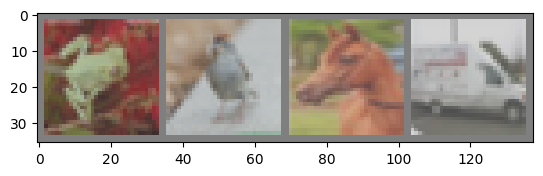

frog  bird  horse truck


In [ ]:


# functions to show an image


def imshow(img):
    img = img / 3 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.146
[1,  4000] loss: 1.815
[1,  6000] loss: 1.632
[1,  8000] loss: 1.570
[1, 10000] loss: 1.522
[1, 12000] loss: 1.474
[2,  2000] loss: 1.379
[2,  4000] loss: 1.382
[2,  6000] loss: 1.363
[2,  8000] loss: 1.321
[2, 10000] loss: 1.314
[2, 12000] loss: 1.259
Finished Training


In [ ]:
PATH = r'\model.pth'
torch.save(net.state_dict(), PATH)

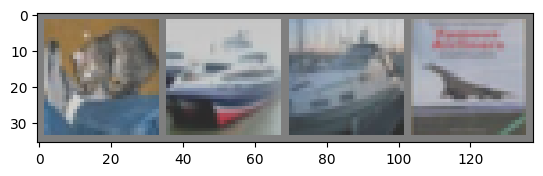

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   car   plane


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 63.1 %
Accuracy for class: car   is 77.3 %
Accuracy for class: bird  is 21.4 %
Accuracy for class: cat   is 29.1 %
Accuracy for class: deer  is 51.2 %
Accuracy for class: dog   is 45.7 %
Accuracy for class: frog  is 57.0 %
Accuracy for class: horse is 77.5 %
Accuracy for class: ship  is 53.4 %
Accuracy for class: truck is 68.8 %


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:


def datald(batch_size):
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)

    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    return trainloader, testloader, classes


def img(images, labels, classes):
    images = images / 2 + 0.5
    npimg = images.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


class Networ(nn.Module):
    def __init__(self, num_conv_layers, num_fc_layers, num_filters, num_nodes, activation):
        super(Networ, self).__init__()
        layers = []
        in_channels = 3
        for _ in range(num_conv_layers):
            layers.extend([
                nn.Conv2d(in_channels, num_filters, 5),
                nn.MaxPool2d(2, 2),
                activation(),
            ])
            in_channels = num_filters
        self.convolutional = nn.Sequential(*layers)

        layers = []
        in_features = num_filters * 5 * 5
        for _ in range(num_fc_layers):
            layers.extend([
                nn.Linear(in_features, num_nodes),
                activation(),
            ])
            in_features = num_nodes
        self.fc_layers = nn.Sequential(*layers)

        self.fc_out = nn.Linear(num_nodes, 10)

    def forward(self, x):
        x = self.convolutional(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        x = self.fc_out(x)
        return x


def tmodel(num_conv_layers, num_fc_layers, num_filters, num_nodes, activation, optimizer, num_epochs):
    trainloader, testloader, classes = datald(batch_size)

    net = Networ(num_conv_layers, num_fc_layers, num_filters, num_nodes, activation)
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer(net.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 2000 == 1999:
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
                running_loss = 0.0

    print('Done Train')
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of test images: {accuracy:.2f}%')

    return accuracy


Model-1(accuracy-1)
tmodel(num_conv_layers=2, num_fc_layers=2, num_filters=16, num_nodes=64, activation=nn.ReLU, optimizer=optim.SGD, num_epochs=2)
Model 1 (accuracy1):

Number of layers:
Convolutional Layers: 2
Fully Connected (FC) Layers: 2
Number of nodes per layer:
Convolutional Layers: The number of filters in the final layer is 16.
FC Layers: Each FC layer has 64 nodes.
Activation function: Tanh
Optimizer: Adam
Learning rate: default value for Adam 0.001
Number of epochs: 5

In [ ]:
accuracy1 = tmodel(
    num_conv_layers=2,
    num_fc_layers=2,
    num_filters=16,
    num_nodes=64,
    activation=nn.Tanh,
    optimizer=optim.Adam,
    num_epochs=5
)


Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 1.796
[1,  4000] loss: 1.605
[1,  6000] loss: 1.499
[1,  8000] loss: 1.457
[1, 10000] loss: 1.439
[1, 12000] loss: 1.428
[2,  2000] loss: 1.351
[2,  4000] loss: 1.356
[2,  6000] loss: 1.336
[2,  8000] loss: 1.333
[2, 10000] loss: 1.340
[2, 12000] loss: 1.343
[3,  2000] loss: 1.257
[3,  4000] loss: 1.273
[3,  6000] loss: 1.256
[3,  8000] loss: 1.281
[3, 10000] loss: 1.283
[3, 12000] loss: 1.274
[4,  2000] loss: 1.224
[4,  4000] loss: 1.256
[4,  6000] loss: 1.212
[4,  8000] loss: 1.216
[4, 10000] loss: 1.221
[4, 12000] loss: 1.240
[5,  2000] loss: 1.208
[5,  4000] loss: 1.204
[5,  6000] loss: 1.202
[5,  8000] loss: 1.188
[5, 10000] loss: 1.198
[5, 12000] loss: 1.227
Done Train
Accuracy of test images: 55.61%


Model 2 (accuracy2):

Number of layers:
Convolutional Layers: 2
Fully Connected (FC) Layers: 2
Number of nodes per layer:
Convolutional Layers: The number of filters in the final layer is 16.
FC Layers: Each FC layer has 64 nodes.
Activation function: ReLU
Optimizer: Stochastic Gradient Descent (SGD)
Number of epochs: 4

In [ ]:
accuracy2 = tmodel(
    num_conv_layers=2,
    num_fc_layers=2,
    num_filters=16,
    num_nodes=64,
    activation=nn.ReLU,
    optimizer=optim.SGD,
    num_epochs=4
)

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.303
[1,  4000] loss: 2.301
[1,  6000] loss: 2.300
[1,  8000] loss: 2.296
[1, 10000] loss: 2.291
[1, 12000] loss: 2.277
[2,  2000] loss: 2.209
[2,  4000] loss: 2.121
[2,  6000] loss: 2.029
[2,  8000] loss: 1.965
[2, 10000] loss: 1.903
[2, 12000] loss: 1.859
[3,  2000] loss: 1.799
[3,  4000] loss: 1.733
[3,  6000] loss: 1.670
[3,  8000] loss: 1.620
[3, 10000] loss: 1.630
[3, 12000] loss: 1.609
[4,  2000] loss: 1.574
[4,  4000] loss: 1.558
[4,  6000] loss: 1.504
[4,  8000] loss: 1.508
[4, 10000] loss: 1.489
[4, 12000] loss: 1.456
Done Train
Accuracy of test images: 47.09%


Model 3 (accuracy3):

Number of layers:
Convolutional Layers: 2
Fully Connected (FC) Layers: 3
Number of nodes per layer:
Convolutional Layers: The number of filters in the final layer is 32.
FC Layers: The first two FC layers have 64 nodes each.
Activation function: Leaky ReLU
Optimizer: Stochastic Gradient Descent (SGD)
Learning rate: The learning rate is typically set based on the learning rate schedule, but it's not explicitly mentioned.
Number of epochs: 5

In [ ]:
accuracy3 = tmodel(
    num_conv_layers=2,
    num_fc_layers=3,
    num_filters=32,
    num_nodes=64,
    activation=nn.LeakyReLU,
    optimizer=optim.SGD,
    num_epochs=5
)

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.307
[1,  4000] loss: 2.305
[1,  6000] loss: 2.303
[1,  8000] loss: 2.302
[1, 10000] loss: 2.302
[1, 12000] loss: 2.300
[2,  2000] loss: 2.298
[2,  4000] loss: 2.295
[2,  6000] loss: 2.291
[2,  8000] loss: 2.281
[2, 10000] loss: 2.256
[2, 12000] loss: 2.181
[3,  2000] loss: 2.043
[3,  4000] loss: 1.986
[3,  6000] loss: 1.907
[3,  8000] loss: 1.866
[3, 10000] loss: 1.805
[3, 12000] loss: 1.776
[4,  2000] loss: 1.730
[4,  4000] loss: 1.682
[4,  6000] loss: 1.668
[4,  8000] loss: 1.622
[4, 10000] loss: 1.584
[4, 12000] loss: 1.583
[5,  2000] loss: 1.553
[5,  4000] loss: 1.526
[5,  6000] loss: 1.510
[5,  8000] loss: 1.490
[5, 10000] loss: 1.447
[5, 12000] loss: 1.435
Done Train
Accuracy of test images: 47.91%


# Define NN for the PART1 DATA

In [ ]:
X_train, X_com, Y_train, Y_com = train_test_split(X_data, Y_data, test_size=0.3, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_com, Y_com, test_size=0.5, random_state=42)


In [ ]:
#step 12
print(f'X_train:{X_train.shape}\nX_test:{X_test.shape}\nY_train:{Y_train.shape}\nY_test:{Y_test.shape}\nX_val:{X_val.shape}\nY_val:{Y_val.shape}')

X_train:(36523, 5)
X_test:(7827, 5)
Y_train:(36523,)
Y_test:(7827,)
X_val:(7827, 5)
Y_val:(7827,)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class ShallowNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ShallowNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        # Removed sigmoid activation

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        # No sigmoid here
        return x




In [ ]:
# Determine the sizes
input_size = X_train.shape[1]  # Number of features
hidden_size = 64  # Example size, adjust based on your problem
output_size = 1  # Adjust based on your problem, e.g., number of classes

model = ShallowNN(input_size, hidden_size, output_size)

# Choose a loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # For regression tasks; use nn.CrossEntropyLoss() for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Learning rate is an example


In [ ]:
X_train_tensor = torch.tensor(X_train.to_numpy().astype(np.float32))
Y_train_tensor = torch.tensor(Y_train.to_numpy().astype(np.float32))  # Use .long() for classification targets
X_test_tensor = torch.tensor(X_test.to_numpy().astype(np.float32))
Y_test_tensor = torch.tensor(Y_test.to_numpy().astype(np.float32))  # Use .long() for classification targets
X_val_tensor = torch.tensor(X_val.to_numpy().astype(np.float32))
Y_val_tensor = torch.tensor(Y_val.to_numpy().astype(np.float32))  # Use .long() for classification targets


In [ ]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
epochs=100


In [ ]:
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Assuming X_train_tensor and Y_train_tensor are tensors of the entire dataset
    outputs = model(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor.view(-1, 1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    predicted = torch.round(torch.sigmoid(outputs))
    correct += (predicted == Y_train_tensor.view(-1, 1)).float().sum().item()
    total += Y_train_tensor.size(0)

    train_accuracy = correct / total
    train_losses.append(running_loss)
    train_accuracies.append(train_accuracy)

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, Y_val_tensor.view(-1, 1))

        val_predicted = torch.round(torch.sigmoid(val_outputs))
        val_correct = (val_predicted == Y_val_tensor.view(-1, 1)).float().sum().item()
        val_total = Y_val_tensor.size(0)

        val_accuracy = val_correct / val_total
        val_losses.append(val_loss.item())
        val_accuracies.append(val_accuracy)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss:.4f}, Train Acc: {train_accuracy * 100:.2f}%, Val Loss: {val_loss.item():.4f}, Val Acc: {val_accuracy * 100:.2f}%')


Epoch [10/100], Loss: 8.5981, Train Acc: 67.44%, Val Loss: 9.3424, Val Acc: 67.32%
Epoch [20/100], Loss: 7.6688, Train Acc: 50.33%, Val Loss: 4.9375, Val Acc: 68.14%
Epoch [30/100], Loss: 3.3313, Train Acc: 65.76%, Val Loss: 3.7820, Val Acc: 71.37%
Epoch [40/100], Loss: 9.4745, Train Acc: 51.82%, Val Loss: 8.0826, Val Acc: 67.52%
Epoch [50/100], Loss: 1.8597, Train Acc: 74.89%, Val Loss: 4.0272, Val Acc: 69.35%
Epoch [60/100], Loss: 4.8512, Train Acc: 75.58%, Val Loss: 6.8231, Val Acc: 67.08%
Epoch [70/100], Loss: 2.6678, Train Acc: 62.62%, Val Loss: 5.5745, Val Acc: 68.01%
Epoch [80/100], Loss: 6.5429, Train Acc: 71.61%, Val Loss: 17.0111, Val Acc: 38.25%
Epoch [90/100], Loss: 8.5816, Train Acc: 70.40%, Val Loss: 11.8090, Val Acc: 72.82%
Epoch [100/100], Loss: 6.5130, Train Acc: 67.55%, Val Loss: 5.6214, Val Acc: 59.18%


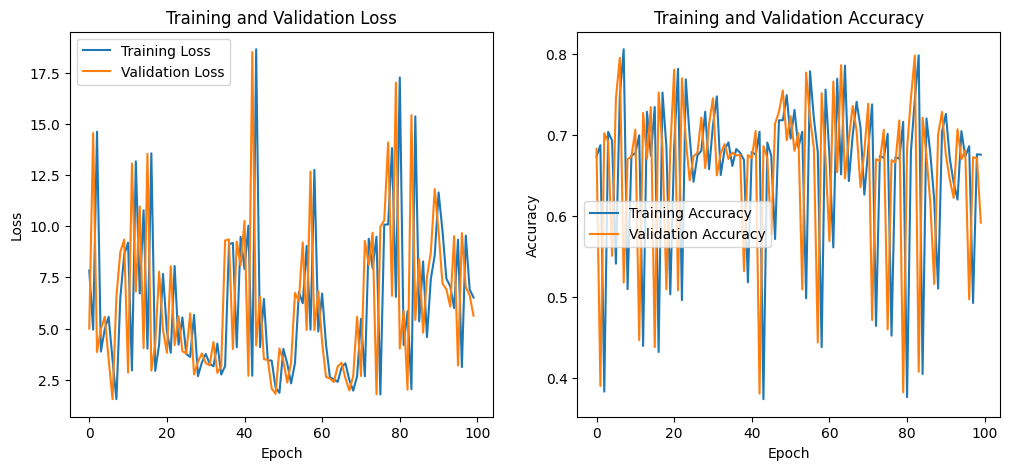

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
torch.save(model.state_dict(), 'model_state_dict.pth')


**PART-III**

In [1]:
pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=7c5da345a1caf0642147986c9d6ded2ce5da9489ed7eb7fabb4649572395e1e6
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [1]:
!pip install torchinfo


In [2]:
from torchvision import transforms
from medmnist import OCTMNIST

# Define the normalization transform
# This converts data to a tensor and normalizes input channels to [0, 1]
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
])

# Load the datasets with the transform applied
train_dataset = OCTMNIST(split='train', transform=transform, download=True)
val_dataset = OCTMNIST(split='val', transform=transform, download=True)
test_dataset = OCTMNIST(split='test', transform=transform, download=True)

from torchvision import transforms
from medmnist import OCTMNIST
# Define the normalization transform
# This converts data to a tensor and normalizes input channels to [0, 1]
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts to torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
])
# Load the datasets with the transform applied
train_dataset = OCTMNIST(split='train', transform=transform, download=True)
val_dataset = OCTMNIST(split='val', transform=transform, download=True)
test_dataset = OCTMNIST(split='test', transform=transform, download=True)

Using downloaded and verified file: /root/.medmnist/octmnist.npz
Using downloaded and verified file: /root/.medmnist/octmnist.npz
Using downloaded and verified file: /root/.medmnist/octmnist.npz
Using downloaded and verified file: /root/.medmnist/octmnist.npz
Using downloaded and verified file: /root/.medmnist/octmnist.npz
Using downloaded and verified file: /root/.medmnist/octmnist.npz


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from torchinfo import summary
import torch.nn.functional as F
import plotly as plotly
import scipy.stats as stats
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
import pickle
from scipy import stats
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau


In [5]:
import time
from torch.utils.data import Dataset, DataLoader

In [6]:
import os
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from PIL import Image
from collections import Counter
from torchsummary import summary
import random

**Download the OCTMNIST 2D dataset and prepare it for training:**

In [7]:

from torchvision import datasets, transforms
from torchvision.utils import make_grid
from PIL import Image
from collections import Counter
from torchsummary import summary
import random

In [8]:
from torch.utils.data import DataLoader

# Set batch size
batch_size = 64  # You can adjust this based on your system's capabilities

# Train data loader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)

# Validation data loader
valid_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Test data loader
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

from torch.utils.data import DataLoader
# Set batch size
batch_size = 64  # You can adjust this based on your system's capabilities
# Train data loader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
# Validation data loader
valid_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
# Test data loader
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [10]:
import torch
import torch.nn as nn

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchinfo import summary

class OCTCNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(OCTCNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU())

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # Assuming the input image size to be 28x28, calculate the size here accordingly
        # For a different input size, adjust the calculation below
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Update this based on the actual output size
        self.fc2 = nn.Sequential(
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Parameters setup
in_channels = 1  # Update this based on your input
num_classes = 4
basemodel = OCTCNN(in_channels=in_channels, num_classes=num_classes)
basemodel.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Now, calling summary to print the model architecture details
summary(basemodel, input_size=(1, in_channels, 28, 28))


Layer (type:depth-idx)                   Output Shape              Param #
OCTCNN                                   [1, 4]                    --
├─Sequential: 1-1                        [1, 16, 28, 28]           --
│    └─Conv2d: 2-1                       [1, 16, 28, 28]           160
│    └─BatchNorm2d: 2-2                  [1, 16, 28, 28]           32
│    └─ReLU: 2-3                         [1, 16, 28, 28]           --
├─Sequential: 1-2                        [1, 16, 14, 14]           --
│    └─Conv2d: 2-4                       [1, 16, 28, 28]           2,320
│    └─BatchNorm2d: 2-5                  [1, 16, 28, 28]           32
│    └─ReLU: 2-6                         [1, 16, 28, 28]           --
│    └─MaxPool2d: 2-7                    [1, 16, 14, 14]           --
├─Sequential: 1-3                        [1, 64, 14, 14]           --
│    └─Conv2d: 2-8                       [1, 64, 14, 14]           9,280
│    └─BatchNorm2d: 2-9                  [1, 64, 14, 14]           128
│    └─

In [13]:
# Assuming lr is defined somewhere in your code. For example:
lr = 0.01  # Learning rate

# Define the optimizer for OCTCNN
optimizer = optim.SGD(basemodel.parameters(), lr=lr, momentum=0.9)

# Assuming you also need to define a loss function based on a task variable
task = "classification"  # or "multi-label, binary-class" for multi-label binary classification tasks

# Define loss function based on the task
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()

# This sets up the optimizer and loss function for training the OCTCNN model


In [21]:
import torch
import time
from sklearn.metrics import accuracy_score

def train_model(model, train_loader, valid_loader, optimizer, criterion, num_epochs, task):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    train_losses = []
    train_accuracies = []
    valid_losses = []
    valid_accuracies = []
    for epoch in range(num_epochs):
        start_time = time.time()
        model.train()
        total_train_loss = 0
        train_predictions = []
        train_targets = []
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)

            if task == 'multi-label, binary-class':
                labels = labels.to(torch.float32)
                loss = criterion(outputs, labels)
            else:
                labels = labels.squeeze().long()
                loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_predictions.extend(predicted.cpu().numpy())
            train_targets.extend(labels.cpu().numpy())
        train_accuracy = accuracy_score(train_targets, train_predictions)
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        total_valid_loss = 0
        valid_predictions = []
        valid_targets = []
        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)

                if task == 'multi-label, binary-class':
                    labels = labels.to(torch.float32)
                    loss = criterion(outputs, labels)
                else:
                    labels = labels.squeeze().long()
                    loss = criterion(outputs, labels)


                loss = criterion(outputs, labels)
                total_valid_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                valid_predictions.extend(predicted.cpu().numpy())
                valid_targets.extend(labels.cpu().numpy())
            valid_accuracy = accuracy_score(valid_targets, valid_predictions)
            avg_valid_loss = total_valid_loss / len(valid_loader)
            valid_losses.append(avg_valid_loss)
            valid_accuracies.append(valid_accuracy)

        end_time = time.time()
        epoch_time = end_time - start_time
        print(f"Epoch {epoch + 1}/{num_epochs} took {epoch_time:.2f} seconds. "
              f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Validation Loss: {avg_valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.4f}")

    return train_losses, train_accuracies, valid_losses, valid_accuracies

# Ensure you have defined or imported train_loader, valid_loader, basemodel, optimizer, and criterion before calling this function.
# num_epochs = 10  # Adjust as needed
# train_losses, train_accuracies, valid_losses, valid_accuracies = train_model(basemodel, train_loader, valid_loader, optimizer, criterion, num_epochs)


In [22]:
in_channels = 1  # or the correct number of input channels for your dataset
num_classes = 10  # adjust this to match the number of classes in your dataset
num_epochs = 10
basemodel = OCTCNN(in_channels, num_classes)


In [23]:
lr = 0.001  # Learning rate
optimizer = torch.optim.Adam(basemodel.parameters(), lr=lr)


In [24]:
criterion = torch.nn.CrossEntropyLoss()


In [27]:
train_losses, train_accuracies, valid_losses, valid_accuracies = train_model(basemodel, train_loader, valid_loader, optimizer, criterion, num_epochs, task="multi-label")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/10 took 25.58 seconds. Train Loss: 0.4302, Train Accuracy: 0.8510, Validation Loss: 0.3149, Validation Accuracy: 0.8889


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 2/10 took 23.51 seconds. Train Loss: 0.3033, Train Accuracy: 0.8966, Validation Loss: 0.3431, Validation Accuracy: 0.8817


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 3/10 took 21.47 seconds. Train Loss: 0.2669, Train Accuracy: 0.9087, Validation Loss: 0.2813, Validation Accuracy: 0.9032


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 4/10 took 24.38 seconds. Train Loss: 0.2437, Train Accuracy: 0.9164, Validation Loss: 0.2594, Validation Accuracy: 0.9131


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 5/10 took 27.78 seconds. Train Loss: 0.2238, Train Accuracy: 0.9219, Validation Loss: 0.2540, Validation Accuracy: 0.9142


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 6/10 took 29.65 seconds. Train Loss: 0.2040, Train Accuracy: 0.9302, Validation Loss: 0.2687, Validation Accuracy: 0.9131


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 7/10 took 21.79 seconds. Train Loss: 0.1877, Train Accuracy: 0.9353, Validation Loss: 0.2678, Validation Accuracy: 0.9115


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 8/10 took 22.46 seconds. Train Loss: 0.1668, Train Accuracy: 0.9425, Validation Loss: 0.2790, Validation Accuracy: 0.9081


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 9/10 took 22.38 seconds. Train Loss: 0.1502, Train Accuracy: 0.9474, Validation Loss: 0.2286, Validation Accuracy: 0.9269


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 10/10 took 22.12 seconds. Train Loss: 0.1347, Train Accuracy: 0.9530, Validation Loss: 0.2582, Validation Accuracy: 0.9211


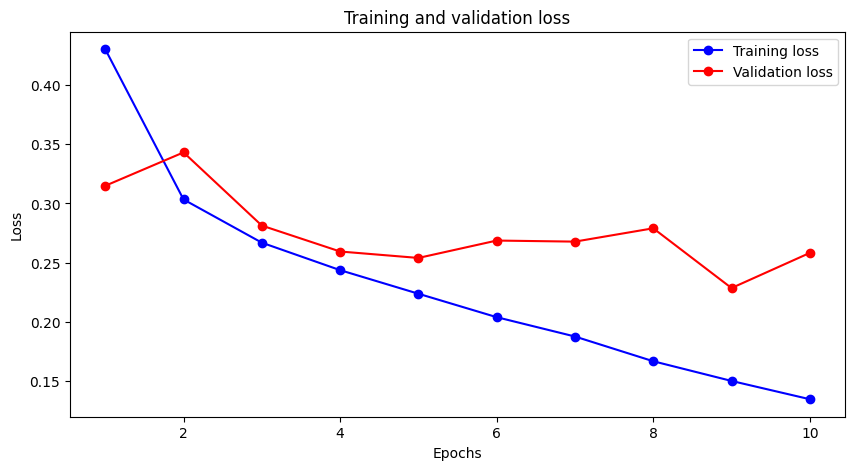

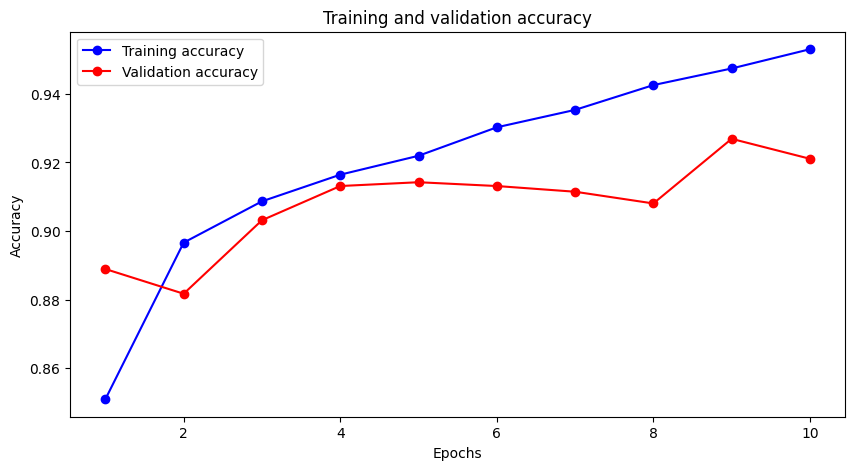

In [28]:
import matplotlib.pyplot as plt

# Assuming train_losses, train_accuracies, valid_losses, valid_accuracies are defined and filled with data from your training function

epochs = range(1, len(train_losses) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, 'bo-', label='Training loss')
plt.plot(epochs, valid_losses, 'ro-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, 'bo-', label='Training accuracy')
plt.plot(epochs, valid_accuracies, 'ro-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [29]:
additional_info = {
    'epoch': 5,
    'model_state': basemodel.state_dict(),
    'optimizer_state': optimizer.state_dict(),
    'other_metadata': 'any_other_information'
}

# Saving the model and additional information
save_path = 'model_checkpoint.pkl'
torch.save(additional_info, save_path)

## Improved CNN

In [13]:
batch_size = 64

In [14]:


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchinfo import summary

class OCTCNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(OCTCNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout(0.2))  # Add dropout)

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())

        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU())

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # Assuming the input image size to be 28x28, calculate the size here accordingly
        # For a different input size, adjust the calculation below
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Update this based on the actual output size
        self.dropout = nn.Dropout(0.1)
        self.fc2 = nn.Sequential(
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Parameters setup
in_channels = 1  # Update this based on your input
num_classes = 4
basemodel = OCTCNN(in_channels=in_channels, num_classes=num_classes)
basemodel.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# Now, calling summary to print the model architecture details
summary(basemodel, input_size=(1, in_channels, 28, 28))


Layer (type:depth-idx)                   Output Shape              Param #
OCTCNN                                   [1, 4]                    --
├─Sequential: 1-1                        [1, 16, 28, 28]           --
│    └─Conv2d: 2-1                       [1, 16, 28, 28]           160
│    └─BatchNorm2d: 2-2                  [1, 16, 28, 28]           32
│    └─ReLU: 2-3                         [1, 16, 28, 28]           --
│    └─Dropout: 2-4                      [1, 16, 28, 28]           --
├─Sequential: 1-2                        [1, 128, 14, 14]          --
│    └─Conv2d: 2-5                       [1, 128, 28, 28]          18,560
│    └─BatchNorm2d: 2-6                  [1, 128, 28, 28]          256
│    └─ReLU: 2-7                         [1, 128, 28, 28]          --
│    └─MaxPool2d: 2-8                    [1, 128, 14, 14]          --
├─Sequential: 1-3                        [1, 64, 14, 14]           --
│    └─Conv2d: 2-9                       [1, 64, 14, 14]           73,792
│    

In [15]:

lr = 0.001  # Learning rate

# Define the optimizer for OCTCNN
optimizer = torch.optim.SGD(basemodel.parameters(), lr=lr, weight_decay=1e-3, momentum = 0.9 )
in_channels = 1  # or the correct number of input channels for your dataset
num_classes = 10  # adjust this to match the number of classes in your dataset
num_epochs = 10
basemodel = OCTCNN(in_channels, num_classes)


# Assuming you also need to define a loss function based on a task variable
task = "classification"  # or "multi-label, binary-class" for multi-label binary classification tasks

# Define loss function based on the task

criterion = nn.CrossEntropyLoss()

# This sets up the optimizer and loss function for training the OCTCNN model


In [27]:
import torch
import time
from sklearn.metrics import accuracy_score

def train_model(model, train_loader, valid_loader, optimizer, criterion, num_epochs, patience, task):
    # Early stopping initialization
    the_last_loss = float('inf')
    patience_counter = 0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    train_losses = []
    train_accuracies = []
    valid_losses = []
    valid_accuracies = []

    for epoch in range(num_epochs):
        start_time = time.time()
        model.train()
        total_train_loss = 0
        train_predictions = []
        train_targets = []

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)

            if task == 'multi-label, binary-class':
                labels = labels.to(torch.float32)
            else:
                labels = labels.squeeze().long()

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_predictions.extend(predicted.cpu().numpy())
            train_targets.extend(labels.cpu().numpy())

        train_accuracy = accuracy_score(train_targets, train_predictions)
        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        total_valid_loss = 0
        valid_predictions = []
        valid_targets = []

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)

                if task == 'multi-label, binary-class':
                    labels = labels.to(torch.float32)
                else:
                    labels = labels.squeeze().long()

                loss = criterion(outputs, labels)
                total_valid_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                valid_predictions.extend(predicted.cpu().numpy())
                valid_targets.extend(labels.cpu().numpy())

            valid_accuracy = accuracy_score(valid_targets, valid_predictions)
            avg_valid_loss = total_valid_loss / len(valid_loader)
            valid_losses.append(avg_valid_loss)
            valid_accuracies.append(valid_accuracy)

        # Check for early stopping
        if valid_losses[-1] < the_last_loss:
            the_last_loss = valid_losses[-1]
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Stopping early at epoch {epoch+1}")
                break

        end_time = time.time()
        epoch_time = end_time - start_time
        print(f"Epoch {epoch + 1}/{num_epochs} took {epoch_time:.2f} seconds. "
              f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Validation Loss: {avg_valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.4f}")

    return train_losses, train_accuracies, valid_losses, valid_accuracies


In [28]:
# Assuming you have set up datasets, OCTCNN, optimizer, criterion
patience = 5  # Number of epochs to wait for improvement before stopping
train_losses, train_accuracies, valid_losses, valid_accuracies = train_model(
    basemodel, train_loader, valid_loader, optimizer, criterion, num_epochs, patience, task = 'multi-label')


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/10 took 23.23 seconds. Train Loss: 0.2298, Train Accuracy: 73.03%, Validation Loss: 0.2292, Validation Accuracy: 69.63%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 2/10 took 23.17 seconds. Train Loss: 0.2298, Train Accuracy: 72.89%, Validation Loss: 0.2291, Validation Accuracy: 69.28%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 3/10 took 23.89 seconds. Train Loss: 0.2298, Train Accuracy: 72.92%, Validation Loss: 0.2290, Validation Accuracy: 69.41%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 4/10 took 24.23 seconds. Train Loss: 0.2298, Train Accuracy: 72.88%, Validation Loss: 0.2290, Validation Accuracy: 69.26%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 5/10 took 22.93 seconds. Train Loss: 0.2298, Train Accuracy: 72.87%, Validation Loss: 0.2292, Validation Accuracy: 69.75%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 6/10 took 22.96 seconds. Train Loss: 0.2298, Train Accuracy: 73.02%, Validation Loss: 0.2291, Validation Accuracy: 69.39%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 7/10 took 23.00 seconds. Train Loss: 0.2298, Train Accuracy: 72.87%, Validation Loss: 0.2291, Validation Accuracy: 69.58%


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Stopping early at epoch 8


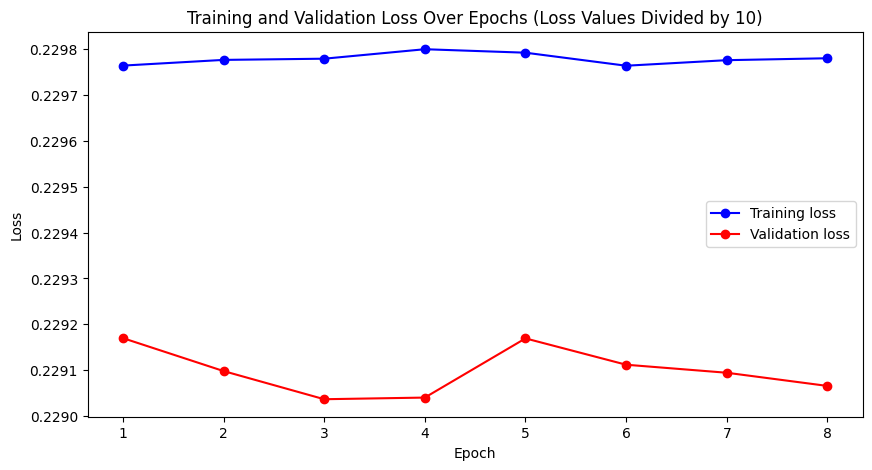

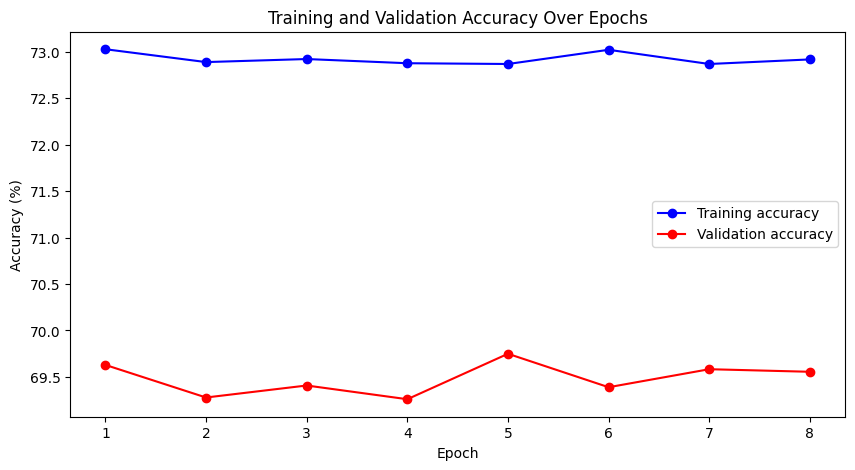

In [29]:
import matplotlib.pyplot as plt

# Assuming train_losses, train_accuracies, valid_losses, valid_accuracies are defined and filled with data from your training function

epochs = range(1, len(train_losses) + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, 'bo-', label='Training loss')
plt.plot(epochs, valid_losses, 'ro-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracies, 'bo-', label='Training accuracy')
plt.plot(epochs, valid_accuracies, 'ro-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [97]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.4 MB/s eta 0:00:00
